<a href="https://colab.research.google.com/github/Zahramashayekhpour/organic-and-nonorganic-fruit-classification/blob/master/Evaluation_the_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive   ## allow Colab to connect your Drive
root = '/content/gdrive/'
drive.mount( root )

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.3, random_state=0)
    return X_tr, X_te, Y_tr, Y_te

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import sklearn as sk
from sklearn.neural_network import MLPClassifier

classifiers = ['LinearDiscriminantAnalysis','XGBClassifier','GaussianNB',   ## i add these three classifiers
               'LinearSVM', 'RadialSVM', 'MLP',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [LinearDiscriminantAnalysis(),
          XGBClassifier(),
          GaussianNB(),
          svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0),
          MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 10), random_state=1)]


def acc_score(df,label):

    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    precision=[]
    recall=[]
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        precision.append(precision_score(Y_test, predictions))
        recall.append(recall_score(Y_test, predictions))

        j = j+1
    Score["Accuracy"] = acc
    Score["precision"]=precision
    Score["recall"]=recall
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score



def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

### 1. Looking at dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/thesis-article-2023/classic/features_DF/apple_RGB/apple-RGB-JUST RGB(without ycbcr).csv')
df = df.dropna(axis='columns')

## remove class and images name column from dataframe to achieve only feature matrix
y_data=df['class']  #label
x_data=df.loc[:, df.columns != 'images_name']
x_data=x_data.loc[:, x_data.columns != 'class']   #feature dataframe
x_data = x_data.loc[:, ~x_data.columns.str.contains('^Unnamed')]

In [ ]:

#x_data.drop(['HuMoments'], axis=1, inplace=True)
#x_data

In [ ]:
 display(x_data.head())
print("All the features in this dataset have continuous values")

,r_means,r_stds,r_skews,g_means,g_stds,g_skew,b_means,b_stds,b_skews,h_means,...,v_skews,L_means,L_stds,L_skews,a_means,a_stds,a_skew,b_means.1,b_stds.1,b_skews.1
0,0.062047,0.104306,0.648646,0.055540,0.064870,0.649231,0.089498,0.122492,0.492454,0.237875,...,0.648788,0.060584,0.085519,0.716830,0.370628,0.357565,0.747464,0.086465,0.119645,0.423897
1,0.075017,0.130342,0.655915,0.095985,0.127893,0.623246,0.166362,0.254336,0.430429,0.460235,...,0.656049,0.093650,0.140893,0.713640,0.341699,0.324589,0.796341,0.037318,0.066136,0.950805
2,0.312521,0.408129,0.427776,0.255757,0.290494,0.349115,0.159838,0.192142,0.405697,0.035866,...,0.427897,0.285737,0.343370,0.442219,0.426336,0.365246,0.639230,0.323195,0.371532,0.174565
3,0.192957,0.285557,0.530535,0.131407,0.137849,0.392468,0.159194,0.191317,0.333296,0.139707,...,0.530654,0.163940,0.205303,0.507498,0.447037,0.446621,0.688356,0.153411,0.193717,0.302148
4,0.436008,0.595138,0.397768,0.453154,0.533883,0.273677,0.209647,0.269883,0.363661,0.051406,...,0.397878,0.454028,0.568344,0.382141,0.299728,0.206099,0.753040,0.479146,0.552669,0.150460


All the features in this dataset have continuous values


### 2. Checking Accuracy

In [ ]:
score1 = acc_score(x_data,y_data)
score1

,Classifier,Accuracy,precision,recall
0,LinearDiscriminantAnalysis,0.915152,0.927711,0.905882
1,GradientBoosting,0.884848,0.912500,0.858824
2,KNeighbors,0.866667,0.870588,0.870588
3,LinearSVM,0.854545,0.876543,0.835294
4,RandomForest,0.854545,0.858824,0.858824
5,AdaBoost,0.848485,0.840909,0.870588
6,XGBClassifier,0.842424,0.855422,0.835294
7,Logistic,0.842424,0.855422,0.835294
8,RadialSVM,0.836364,0.853659,0.823529
9,MLP,0.824242,0.841463,0.811765


In [ ]:
#score1.to_csv('/content/gdrive/MyDrive/thesis-article-2023/classic/evaluation result/appleRGB/apple-RGB-JUST RGB(without ycbcr).csv')


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

classifiers = ['LinearDiscriminantAnalysis','XGBClassifier','GaussianNB',   ## i add these three classifiers
               'LinearSVM', 'RadialSVM', 'MLP',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [LinearDiscriminantAnalysis(),
          XGBClassifier(),
          GaussianNB(),
          svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0),
          MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 10), random_state=1)]

In [ ]:
from pandas._libs.tslibs.parsing import try_parse_date_and_time

Score = pd.DataFrame({"Classifier":classifiers})
j = 0
acc = []
precision=[]
recall=[]
fpr=[]
tpr=[]
auc=[]

for i in models:
       model = i
       model.fit(x_train,y_train)
       predictions = model.predict(x_test)

       #fpr, tpr, _ = roc_curve(y_test,predictions)

       auc.append(roc_auc_score(y_test, predictions))
       acc.append(accuracy_score(y_test,predictions))
       precision.append(precision_score(y_test, predictions))
       recall.append(recall_score(y_test, predictions))


# Set name of the classifiers as index labels
#result_table.set_index('classifiers', inplace=True)

j = j+1
Score["Accuracy"] = acc
Score["precision"]=precision
Score["recall"]=recall
Score["auc"]=auc
#Score["fpr"]=fpr
#Score["tpr"]=tpr
Score.sort_values(by="Accuracy", ascending=False,inplace = True)
Score.reset_index(drop=True, inplace=True)

In [ ]:
Score

,Classifier,Accuracy,precision,recall,auc
0,LinearDiscriminantAnalysis,0.927273,0.905882,0.950617,0.927690
1,GradientBoosting,0.915152,0.903614,0.925926,0.915344
2,XGBClassifier,0.884848,0.860465,0.913580,0.885362
3,KNeighbors,0.884848,0.869048,0.901235,0.885141
4,Logistic,0.878788,0.827957,0.950617,0.880071
5,AdaBoost,0.860606,0.829545,0.901235,0.861332
6,LinearSVM,0.854545,0.806452,0.925926,0.855820
7,RadialSVM,0.854545,0.806452,0.925926,0.855820
8,MLP,0.854545,0.806452,0.925926,0.855820
9,RandomForest,0.854545,0.827586,0.888889,0.855159


AUROC is a semi-proper scoring rules and actually uses the raw probabilities to calculate the best threshold to differentiate the two classes, that is in comparison to a default call to predict, which uses the "non-informative" threshold of 0.5.

Other measures such as accuracy, F1, recall, and others are not proper scoring rules, and they work on classes, so they do not bother with the actual probabilities but require you to classify the observations beforehand.

As you said, the predict function returns the prediction as True/False value, whereas proba function returns probabilities, values between one and zero and this is the reason for the difference.

AUC means "area under the curve" which is indeed different if the curve is a 0/1 step function or a curve made of continuous values.

Let's imagine you have only one example, it should be classified as False. If your classifier yields the probability of 0.7, the ROC-AUC value is 1.0-0.7=0.3. If you used predict, the prediction will be True = 1.0, so the ROC-AUC will be 1.0-1.0=0.0.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [XGBClassifier(),
               LinearDiscriminantAnalysis(),
               GaussianNB(),
               svm.SVC(kernel='linear',probability=True),
               #svm.SVC(kernel='rbf',probability=True),
               LogisticRegression(max_iter = 1000),
               RandomForestClassifier(n_estimators=200, random_state=0),
               AdaBoostClassifier(random_state = 0),
               KNeighborsClassifier(),
               DecisionTreeClassifier(random_state=0),
               GradientBoostingClassifier(random_state=0),
               MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 10), random_state=1)
               ]
Score = pd.DataFrame({"Classifier":classifiers})
j = 0
acc = []
precision=[]
recall=[]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    yproba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

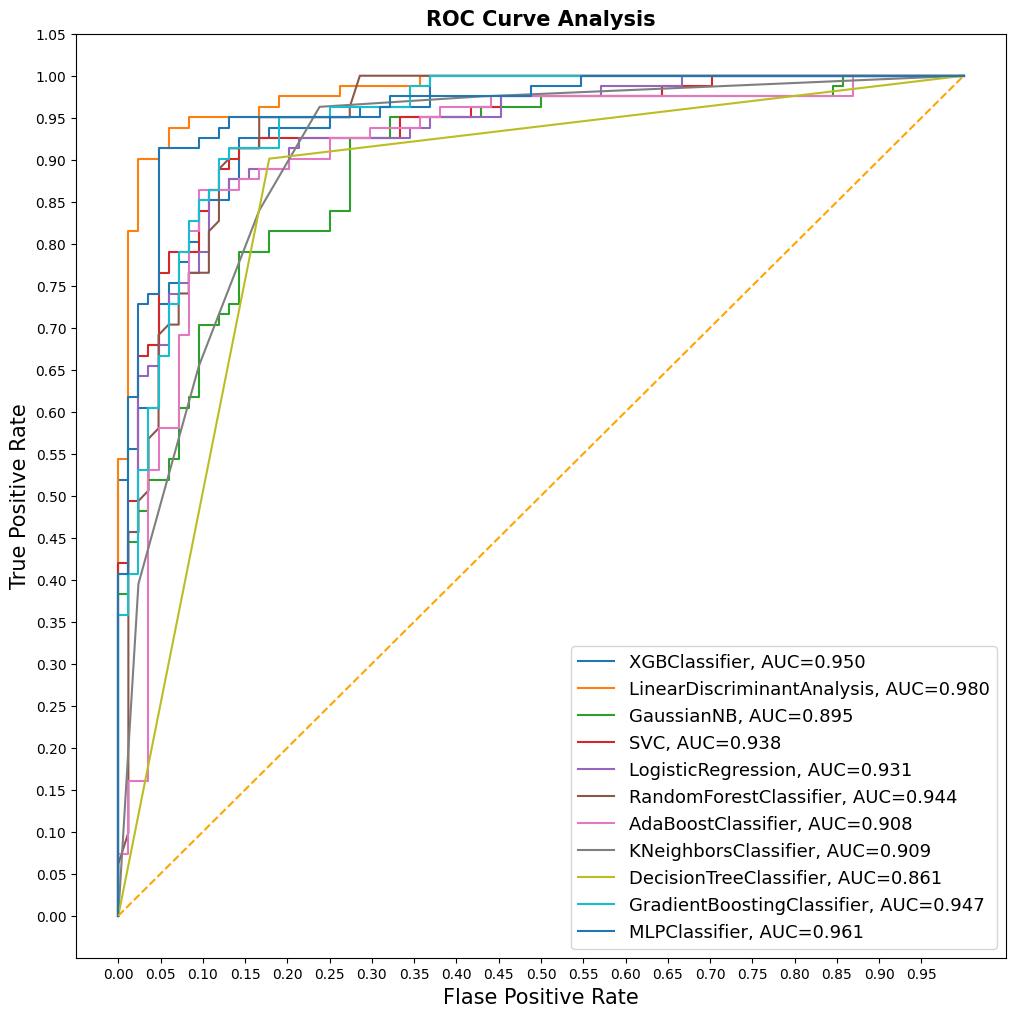

In [ ]:
fig = plt.figure(figsize=(12,12))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1., step=0.05))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.05))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()